<Figure size 2880x1440 with 0 Axes>

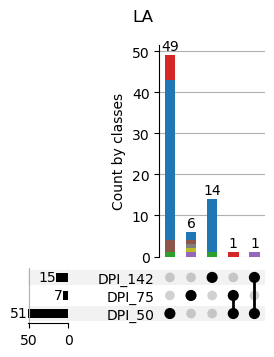

In [1]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme(color_codes=True)
from matplotlib.pyplot import gcf
from upsetplot import UpSet
from matplotlib import cm

# import superclass information from molnetenhancer data.
# features in rows.
data_b = pandas.read_csv("3ABE-1ABC-annotation.csv")
data_b = data_b.set_index(['features'])
mass_class_series = data_b.pop("classes")

data_DPI_50 = pandas.read_csv("3A-1A-wilcox-RF-cutoff-LA.csv")
data_DPI_50 = data_DPI_50.set_index(['mass'])

data_DPI_75 = pandas.read_csv("3B-1B-wilcox-RF-cutoff-LA.csv")
data_DPI_75 = data_DPI_75.set_index(['mass'])

data_DPI_142 = pandas.read_csv("3E-1C-wilcox-RF-cutoff-LA.csv")
data_DPI_142 = data_DPI_142.set_index(['mass'])

DPI_series_50 = data_DPI_50.pop("DPI_50")
DPI_series_75 = data_DPI_75.pop("DPI_75")
DPI_series_142 = data_DPI_142.pop("DPI_142")

col_colors = pandas.DataFrame(DPI_series_50).join(pandas.DataFrame(DPI_series_75),how='outer').join(pandas.DataFrame(DPI_series_142),how='outer').join(pandas.DataFrame(mass_class_series), how = 'inner')
col_colors = col_colors.set_index(col_colors.DPI_50 == 1).set_index(col_colors.DPI_75 == 1, append=True).set_index(col_colors.DPI_142 == 1, append=True)

metabolites_color = {'No matches':(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
           'Benzenoids':(1.0, 0.4980392156862745, 0.054901960784313725), 
           'Organic acids and derivatives':(0.17254901960784313, 0.6274509803921569, 0.17254901960784313), 
           'Lipids and lipid-like molecules':(0.8392156862745098, 0.15294117647058825, 0.1568627450980392), 
           'Organoheterocyclic compounds':(0.5803921568627451, 0.403921568627451, 0.7411764705882353),
           'Nucleosides, nucleotides, and analogues':(0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
           'Phenylpropanoids and polyketides':(0.8901960784313725, 0.4666666666666667, 0.7607843137254902), 
           'Organic nitrogen compounds':(0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
           'Organic oxygen compounds':(0.7372549019607844, 0.7411764705882353, 0.13333333333333333)}

# plot the upset plot
upset = UpSet(col_colors,show_counts = True, intersection_plot_elements=0, sort_categories_by = None, element_size=20)  # disable the default bar chart
upset.add_stacked_bars(by='classes', colors=metabolites_color, title="Count by classes", elements=10)
plt.figure(figsize = (40, 20))
plt.style.use('default')
upset.plot()
plt.legend('',frameon=False)
plt.suptitle("LA")
plt.savefig("upset-plot-DPI-overlap-LA.pdf", dpi = 300, bbox_inches = 'tight')
plt.savefig("upset-plot-DPI-overlap-LA.png", dpi = 300, bbox_inches = 'tight')
